In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.dates as mdates
from collections import Counter
import numpy as np

#OCC_PATH = '/home/josejm/UNIVERSIDAD/SIT/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/occ/'
OCC_PATH = '/home/josejm/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/occ/'
#SPEED_PATH = '/home/josejm/UNIVERSIDAD/SIT/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/speed/'
SPEED_PATH = '/home/josejm/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/speed/'

In [3]:
plt.rc('figure', figsize=(12, 8))

## Read global data occ flow

In [4]:
glob = pd.read_table(OCC_PATH + "global_occ.txt", header=None)
glob.columns=['date', 'L1_flow', 'L1_occ', 'L2_flow', 'L2_occ','L3_flow', 'L3_occ','L4_flow', 'L4_occ', 'L5_flow', 'L5_occ', 'flow', 'occ', 'lanes', 'observed']
glob.date = pd.to_datetime(glob.date)

In [5]:
glob.head()

,date,L1_flow,L1_occ,L2_flow,L2_occ,L3_flow,L3_occ,L4_flow,L4_occ,L5_flow,L5_occ,flow,occ,lanes,observed
0,2006-10-22 00:00:00,17.0,2.1,23.0,2.7,24.0,3.3,22.0,3.1,17.0,2.6,103.0,2.8,5,100.0
1,2006-10-22 00:05:00,12.0,1.5,22.0,2.7,25.0,3.3,25.0,3.3,23.0,3.2,107.0,2.8,5,100.0
2,2006-10-22 00:10:00,12.0,1.5,25.0,3.3,25.0,3.3,23.0,3.0,17.0,2.7,102.0,2.8,5,100.0
3,2006-10-22 00:15:00,15.0,1.9,22.0,2.7,25.0,3.3,25.0,3.8,25.0,3.8,112.0,3.1,5,100.0
4,2006-10-22 00:20:00,14.0,1.7,23.0,2.9,21.0,2.8,25.0,4.1,21.0,3.3,104.0,3.0,5,100.0


### Flujo global

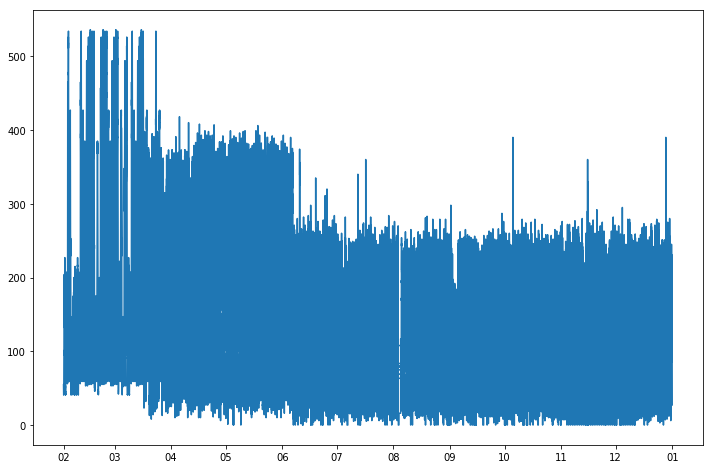

In [6]:
loc_glob = mdates.MonthLocator()
fmt_glob = mdates.DateFormatter('%m')

fig_glob, ax_glob = plt.subplots()
ax_glob.plot(glob.date, glob.flow)

ax_glob.xaxis.set_major_locator(loc_glob)
ax_glob.xaxis.set_major_formatter(fmt_glob)

## Read Month data occ flow

In [7]:
def read_month_occ(month):
    path_month = os.path.join(OCC_PATH, month)
    month_list = [pd.read_table(os.path.join(path_month, week)) for week in os.listdir(path_month)]
    month = pd.concat(month_list)
    month.columns=['date', 'L1_flow', 'L1_occ', 'L2_flow', 'L2_occ','L3_flow', 'L3_occ','L4_flow', 'L4_occ', 'L5_flow', 'L5_occ', 'flow', 'occ', 'lanes', 'observed']
    month.date = pd.to_datetime(month.date)
    return month


m_occ = [0]*13
m_occ[2] = read_month_occ('February')
m_occ[3 ] = read_month_occ('March')
m_occ[4 ] = read_month_occ('April')
m_occ[5 ] = read_month_occ('May')
m_occ[6 ] = read_month_occ('June')
m_occ[7 ] = read_month_occ('July')
m_occ[8 ] = read_month_occ('August')
m_occ[9 ] = read_month_occ('September')
m_occ[10]  = read_month_occ('October')
m_occ[11]  = read_month_occ('November')
m_occ[12]  = read_month_occ('December')

## Read Month data speed flow

In [8]:
def read_month_speed(month):
    path_month = os.path.join(SPEED_PATH, month)
    month_list = [pd.read_table(os.path.join(path_month, week)) for week in os.listdir(path_month) if week != '.DS_Store']
    month = pd.concat(month_list)
    month.columns=['date', 'L1_flow', 'L1_speed', 'L2_flow', 'L2_speed','L3_flow', 'L3_speed','L4_flow', 'L4_speed', 'L5_flow', 'L5_speed', 'flow', 'speed', 'lanes', 'observed']
    month.date = pd.to_datetime(month.date)
    return month

m_speed = [0]*13
m_speed[2] = read_month_speed('February')
m_speed[3 ] = read_month_speed('March')
m_speed[4 ] = read_month_speed('April')
m_speed[5 ] = read_month_speed('May')
m_speed[6 ] = read_month_speed('June')
m_speed[7 ] = read_month_speed('July')
m_speed[8 ] = read_month_speed('August')
m_speed[9 ] = read_month_speed('September')
m_speed[10]  = read_month_speed('October')
m_speed[11]  = read_month_speed('November')
m_speed[12]  = read_month_speed('December')


### Flujo diciembre (global)

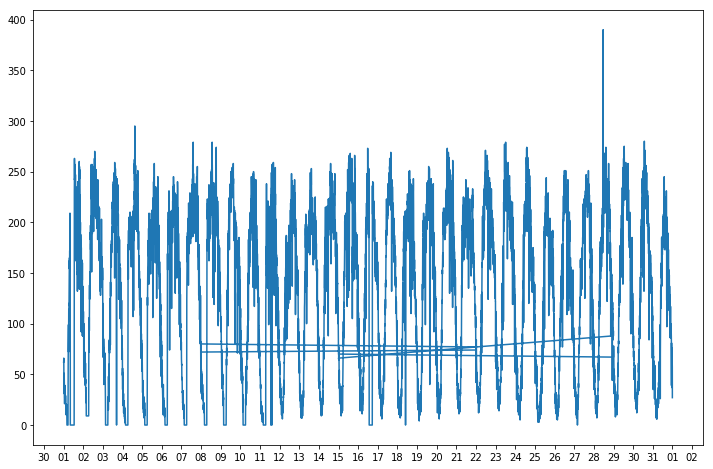

In [9]:
loc = mdates.DayLocator()
fmt = mdates.DateFormatter('%d')

fig, ax = plt.subplots()
ax.plot(m_occ[12].date, m_occ[12].flow)

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(fmt)

## Flujo vs ocupacion global

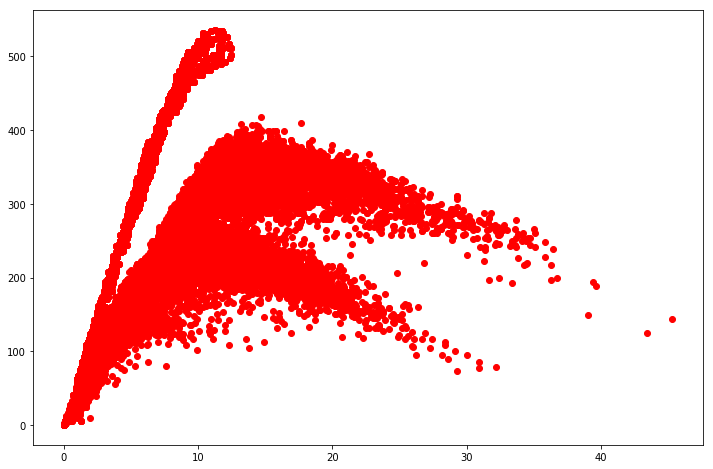

In [10]:
plt.plot(glob.occ, glob.flow, 'ro')

## Flujo vs occ por mes

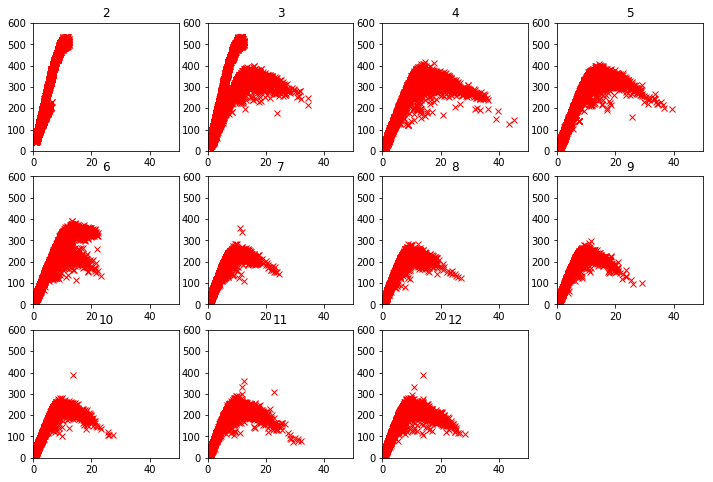

In [11]:
fig = plt.figure()
for i in range(2, 13):
    fig.add_subplot(3, 4, i-1)
    plt.plot(m_occ[i].occ, m_occ[i].flow, 'rx')
    plt.title(str(i))
    plt.xlim([0,50])
    plt.ylim([0,600])


## Datos noviembre

In [12]:
nov_occ = m_occ[11]
nov_occ.head()

,date,L1_flow,L1_occ,L2_flow,L2_occ,L3_flow,L3_occ,L4_flow,L4_occ,L5_flow,L5_occ,flow,occ,lanes,observed
0,2006-11-29 00:00:00,7.0,0.9,11.0,1.4,11.0,1.3,11.0,1.3,10.0,1.6,50.0,1.3,5,100.0
1,2006-11-29 00:05:00,5.0,0.6,11.0,1.1,10.0,1.3,5.0,1.1,4.0,1.0,35.0,1.0,5,100.0
2,2006-11-29 00:10:00,7.0,0.7,15.0,1.9,15.0,1.7,12.0,2.3,7.0,1.3,56.0,1.6,5,100.0
3,2006-11-29 00:15:00,5.0,0.5,11.0,1.3,11.0,1.6,11.0,2.2,7.0,1.1,45.0,1.4,5,100.0
4,2006-11-29 00:20:00,8.0,0.8,13.0,1.7,11.0,2.0,9.0,1.7,10.0,1.7,51.0,1.6,5,100.0


In [13]:
nov_speed = m_speed[11]
nov_speed.head()

,date,L1_flow,L1_speed,L2_flow,L2_speed,L3_flow,L3_speed,L4_flow,L4_speed,L5_flow,L5_speed,flow,speed,lanes,observed
0,2006-11-29 00:00:00,7.0,76.5,11.0,74.0,11.0,72.0,11.0,69.2,10.0,64.5,50.0,71.0,5,100.0
1,2006-11-29 00:05:00,5.0,76.3,11.0,74.6,10.0,72.5,5.0,68.7,4.0,63.6,35.0,72.1,5,100.0
2,2006-11-29 00:10:00,7.0,76.6,15.0,73.8,15.0,74.4,12.0,68.1,7.0,63.8,56.0,71.8,5,100.0
3,2006-11-29 00:15:00,5.0,76.5,11.0,73.8,11.0,73.2,11.0,67.2,7.0,64.5,45.0,70.9,5,100.0
4,2006-11-29 00:20:00,8.0,76.6,13.0,73.3,11.0,70.4,9.0,67.6,10.0,64.6,51.0,70.5,5,100.0


### Ocupación por carril en noviembre

L1 3.9274768518518175
L2 5.68887731481481
L3 6.121423611111127
L4 6.229247685185201
L5 6.159594907407393


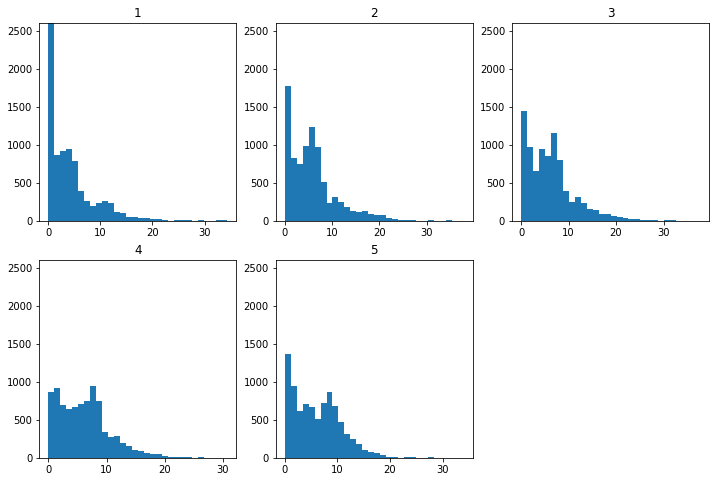

In [15]:
occ_nov = plt.figure()
for i in range(1, 6):
    lane = "L{}".format(i) 
    occ_nov.add_subplot(2, 3, i)
    plt.hist(nov_occ[lane + "_occ"], bins=30)
    plt.title(str(i))
    plt.ylim(0, 2600)
    print(lane, nov_occ[lane + "_occ"].mean())

### Flujo por carril en noviembre

L1 21.971064814814813
L2 31.17974537037037
L3 28.432175925925925
L4 28.986574074074074
L5 29.11828703703704


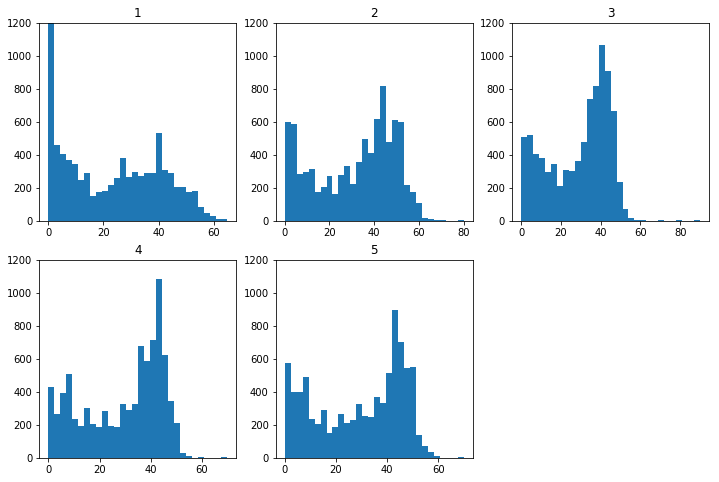

In [16]:
flow_nov = plt.figure()
for i in range(1, 6):
    lane = "L{}".format(i) 
    flow_nov.add_subplot(2, 3, i)
    plt.hist(nov_occ[lane + "_flow"], bins=30)
    plt.title(str(i))
    plt.ylim(0,1200)
    print(lane, nov_occ[lane + "_flow"].mean())
    

### Velocidad por carril en noviembre

L1 65.66646990740757
L2 62.77296296296263
L3 60.27329861111114
L4 59.593842592592644
L5 56.12656250000049


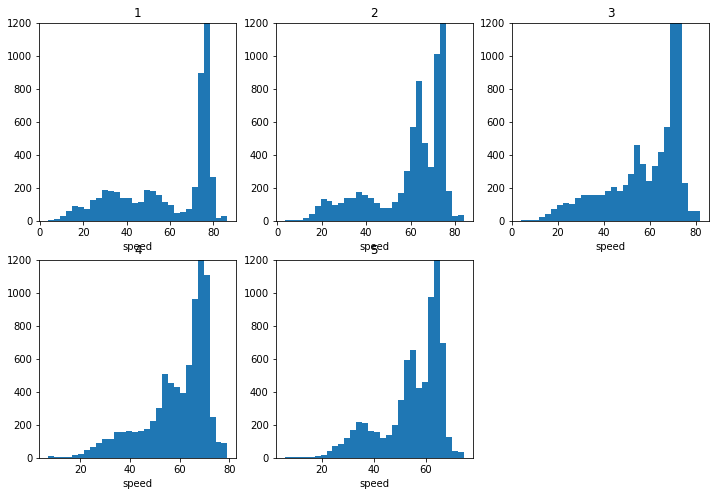

In [17]:
speed_nov = plt.figure()
for i in range(1, 6):
    lane = "L{}".format(i) 
    speed_nov.add_subplot(2, 3, i)
    plt.hist(nov_speed[lane + "_speed"], bins=30)
    plt.title(str(i))
    plt.ylim(0,1200)
    print(lane, nov_speed[lane + "_speed"].mean())
    plt.xlabel('speed')
    

## Flujos vs occ por carril en noviembre

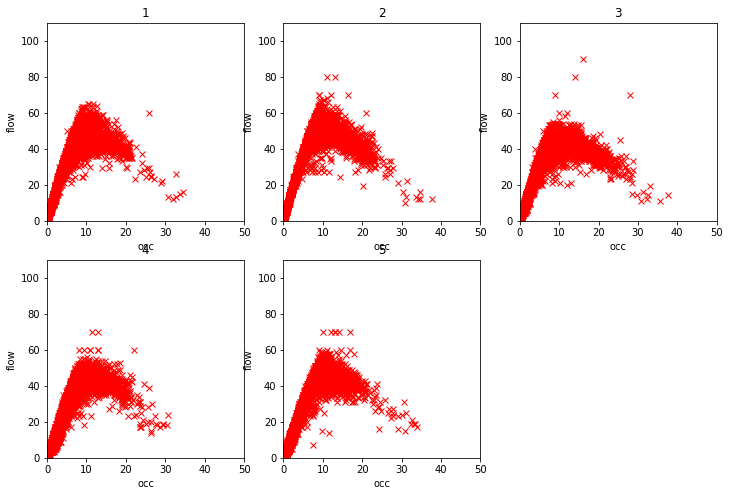

In [18]:
fig_nov = plt.figure()
for i in range(1, 6):
    lane = "L{}".format(i) 
    fig_nov.add_subplot(2, 3, i)
    plt.plot(nov_occ[lane + "_occ"], nov_occ[lane + "_flow"], 'rx')
    plt.title(str(i))
    plt.xlim(0, 50)
    plt.ylim(0, 110)
    plt.xlabel('occ')
    plt.ylabel('flow')
                                         

## Flujo vs velocidad en noviembre

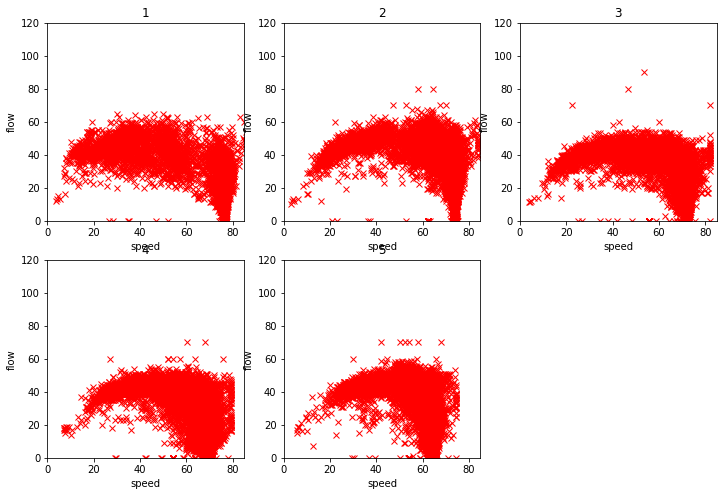

In [19]:
fig_nov = plt.figure()
for i in range(1, 6):
    lane = "L{}".format(i) 
    fig_nov.add_subplot(2, 3, i)
    plt.plot(nov_speed[lane + "_speed"], nov_speed[lane + "_flow"], 'rx')
    plt.ylim(0, 120)
    plt.xlim(0,85)
    plt.title(str(i))
    plt.xlabel('speed')
    plt.ylabel('flow')

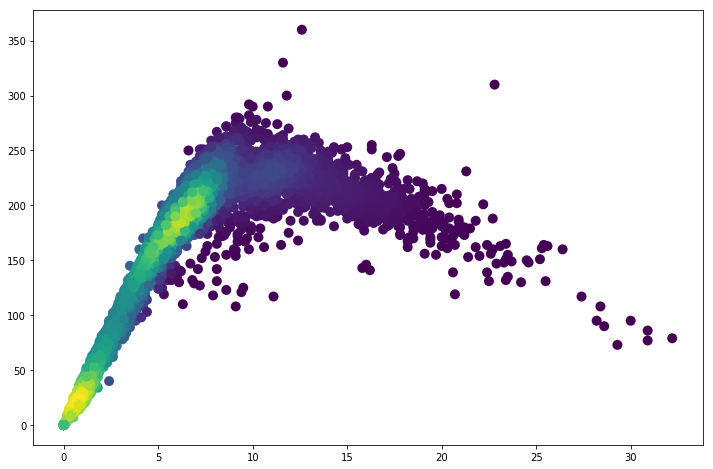

In [27]:
from scipy.stats import gaussian_kde

x = nov_occ.occ
y = nov_occ.flow

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

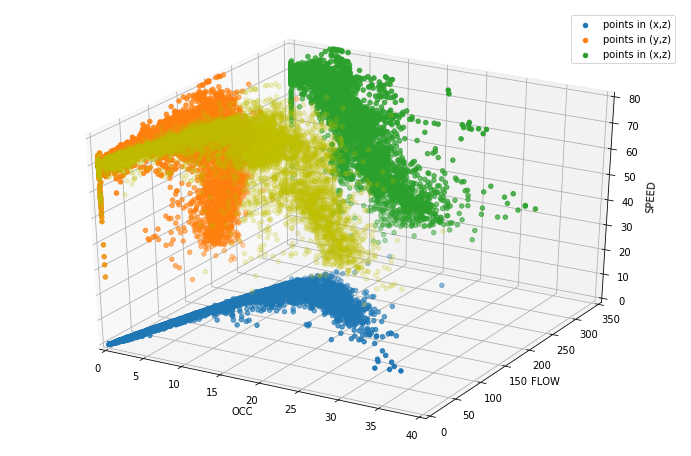

In [85]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X = nov_occ.occ
Y = nov_occ.flow
Z = nov_speed.speed


ax.scatter(X,Y, zs=0, zdir='z',label='points in (x,z)')
ax.scatter(Y,Z, zs=0, zdir='x',label='points in (y,z)')
ax.scatter(X,Z, zs=350, zdir='y',label='points in (x,z)')

ax.scatter3D(X, Y, Z, c='y', alpha=0.2)

ax.set_xlabel('OCC')
ax.set_xlim(0, 40)
ax.set_ylabel('FLOW')
ax.set_ylim(0, 350)
ax.set_zlabel('SPEED')
ax.set_zlim(0, 80)
ax.legend()
plt.show()

## Cálculo densidad

In [86]:
nov_speed['L1_dens']=np.true_divide(nov_speed.L1_flow*12,nov_speed.L1_speed)
nov_speed['L2_dens']=np.true_divide(nov_speed.L2_flow*12,nov_speed.L2_speed)
nov_speed['L3_dens']=np.true_divide(nov_speed.L3_flow*12,nov_speed.L3_speed)
nov_speed['L4_dens']=np.true_divide(nov_speed.L4_flow*12,nov_speed.L4_speed)
nov_speed['L5_dens']=np.true_divide(nov_speed.L5_flow*12,nov_speed.L5_speed)

### Flujo vs densidad

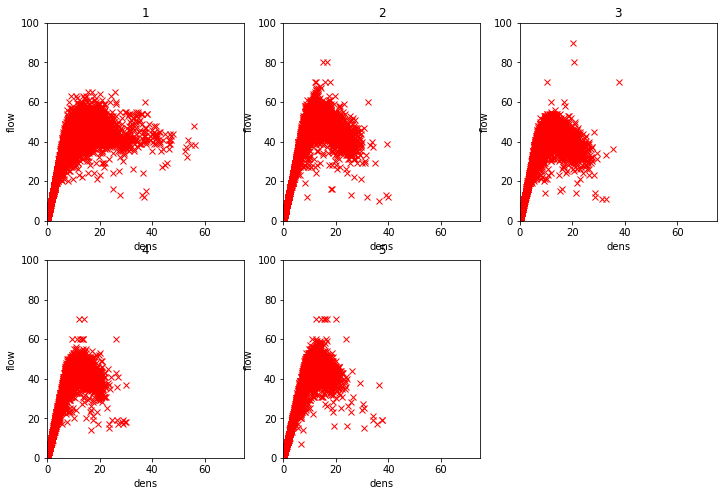

In [87]:
fig_nov = plt.figure()
for i in range(1, 6):
    lane = "L{}".format(i) 
    fig_nov.add_subplot(2, 3, i)
    plt.plot(nov_speed[lane + "_dens"], nov_speed[lane + "_flow"], 'rx')
    plt.title(str(i))
    plt.ylim(0, 100)
    plt.xlim(0,75)
    plt.xlabel('dens')
    plt.ylabel('flow')